Selecting variables

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from bsmcalls import individuals
from bsmcalls import preprocessing
import fwsel
import statsmodels as sm
import attila_utils
%matplotlib inline

In [2]:
calls, clin = individuals.get_data(merge=False, cleancalls=True)

The `cleancalls` argument in `bsmcalls.individuals.get_data` takes care of redundant and degenerate variables.

Below `bsmcalls.preprocessing.preprocess` performs

* imputation or removing a variable if the fraction of missing values exceeds 10%
* prettifying the variable names (replace whitespace and `./\:` characters with `_`)
* turns *Dx* into a response variable by dummifying it so it takes values on $\{0, 1\}$
* standardizes numeric variables

In [3]:
calls1 = preprocessing.preprocess(calls)
clin1 = preprocessing.preprocess(clin)
calls1 = individuals.merge_data(calls1, clin1[['Dx']])

In [4]:
calls1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3411 entries, ('CMC_MSSM_027', 'NeuN_pl', '1', 11973569, 'C/T') to ('CMC_MSSM_331', 'muscle', '17', 29109599, 'T/G')
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   REF                   3411 non-null   category
 1   ALT                   3411 non-null   category
 2   FILTERPASS            3411 non-null   category
 3   AF                    3411 non-null   float64 
 4   BaseQRankSum          3411 non-null   float64 
 5   DP                    3411 non-null   float64 
 6   FS                    3411 non-null   float64 
 7   SOR                   3411 non-null   float64 
 8   VQSLOD                3411 non-null   float64 
 9   culprit               3411 non-null   category
 10  ChromatinState_DLPFC  3411 non-null   category
 11  szdbCNVcount          3411 non-null   float64 
 12  GWASpval              3411 non-null   float64 
 13  Dx             

## Forward variable selection

In [5]:
best1 = fwsel.forward_selected(calls1, 'Dx')

In [6]:
best1.model.formula

'Dx ~ culprit + ALT + DP + AF + FILTERPASS + BaseQRankSum + GWASpval + REF + VQSLOD + SOR + 1'

In [7]:
best1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Dx   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.639
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           6.95e-16
Time:                        12:17:47   Log-Likelihood:                -1985.1
No. Observations:                3411   AIC:                             4016.
Df Residuals:                    3388   BIC:                             4157.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.0215      0.101     10.150      0.000       0.824       1.219
culprit[T.FS]                  -0.3297      0.140     -2.355      0.019      -0.604      -0.055
culprit[T.MQ]                  -0.1405      0.091     -1.545      0.122      -0.319       0.038
culprit[T.MQRankSum]           -0.6639      0.176     -3.767      0.000      -1.009      -0.318
culprit[T.QD]                  -0.3143      0.084     -3.722      0.000      -0.480      -0.149
culprit[T.ReadPosRankSum]      -0.2098      0.102     -2.065      0.039      -0.409      -0.011
culprit[T.SOR]                 -0.3100      0.092     -3.377      0.001      -0.490      -0.130
ALT[T.C]                        0.0677      0.029      2.306      0.021       0.010       0.125
ALT[T.G]                        0.0833      0.031      2.672      0.008       0.022       0.144
ALT[T.T]                        0.0186      0.022      0.834      0.404      -0.025       0.062
FILTERPASS[T.EXT;PASS/PASS]    -0.0386      0.053     -0.731      0.465      -0.142       0.065
FILTERPASS[T.HC/PASS]          -0.0252      0.053     -0.475      0.635      -0.129       0.079
FILTERPASS[T.HC;PASS/PASS]     -0.0528      0.049     -1.070      0.285      -0.149       0.044
FILTERPASS[T.PASS/PASS]         0.0440      0.054      0.821      0.412      -0.061       0.149
REF[T.C]                        0.0111      0.030      0.365      0.715      -0.048       0.071
REF[T.G]                        0.0520      0.031      1.655      0.098      -0.010       0.114
REF[T.T]                        0.0154      0.028      0.558      0.577      -0.039       0.069
DP                             -0.0224      0.009     -2.380      0.017      -0.041      -0.004
AF                             -0.0335      0.010     -3.370      0.001      -0.053      -0.014
BaseQRankSum                   -0.0204      0.010     -2.095      0.036      -0.039      -0.001
GWASpval                       -0.0114      0.007     -1.530      0.126      -0.026       0.003
VQSLOD                          0.0162      0.009      1.708      0.088      -0.002       0.035
SOR                             0.0147      0.010      1.448      0.148      -0.005       0.035
==============================================================================
Omnibus:                      724.911   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              677.370
Skew:                          -1.012   Prob(JB):                    8.15e-148
Kurtosis:                       2.182   Cond. No.                         53.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Some followup

Interestingly, Control samples tend to have higher coverage than SCZ samples.

['named-figure/mean-depth-per-sample.png',
 'named-figure/mean-depth-per-sample.pdf']

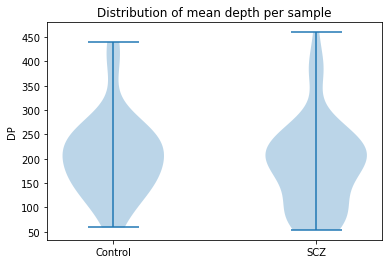

In [8]:
calls2 = calls.copy()
calls2 = individuals.merge_data(calls2, clin[['Dx']])
%matplotlib inline
def plotter(var='DP'):
    s = calls2.groupby(['Dx', 'Individual ID'])[var].mean()
    s = s.dropna()
    fig, ax = plt.subplots()
    vp = ax.violinplot([s.groupby('Dx').get_group(y).values for y in calls2['Dx'].cat.categories])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Control', 'SCZ'])
    ax.set_ylabel(var)
    return((fig, ax, s))

fig, ax, df = plotter('DP')
ax.set_title('Distribution of mean depth per sample')
attila_utils.savefig(fig, 'mean-depth-per-sample')

Somatic variants in control samples also tend to have slightly higher allele frequency.

['named-figure/mean-allele-freq-per-sample.png',
 'named-figure/mean-allele-freq-per-sample.pdf']

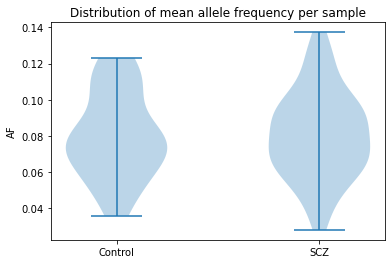

In [9]:
fig, ax, df = plotter('AF')
ax.set_title('Distribution of mean allele frequency per sample')
attila_utils.savefig(fig, 'mean-allele-freq-per-sample')

There seems to be a nonlinear relationship between AF and DP but they are not collinear.  Red means Control and blue SCZ.

['named-figure/DP-AF-Dx-calls.png', 'named-figure/DP-AF-Dx-calls.pdf']

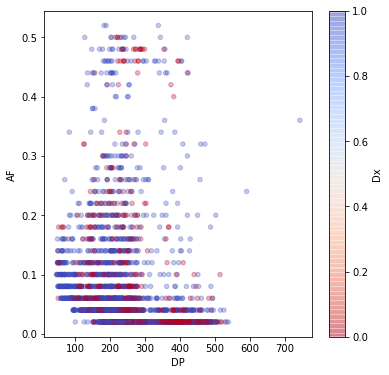

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
calls2_dummy = preprocessing.dummify_var(calls2)
calls2_dummy.plot(kind='scatter', x='DP', y='AF', marker='o', alpha=0.3, c='Dx', cmap='coolwarm_r', ax=ax)
attila_utils.savefig(fig, 'DP-AF-Dx-calls')

In [11]:
from sklearn.neighbors import KernelDensity
from sklearn import preprocessing

# estimate density
Xtrain = np.array(calls[['AF', 'DP']])
scaler = preprocessing.MinMaxScaler()
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)

# estimate density
kde = KernelDensity(bandwidth=2e-2)
kde.fit(Xtrain_scaled)

# prediction on an XY grid
gridsize = 100
def spacer(data):
    '''Get spacer (dleft, dright) from data extrema'''
    dmin = data.min()
    dmax = data.max()
    drange = dmax - dmin
    dleft = dmin - drange * 0.05
    dright = dmax + drange * 0.05
    return((dleft, dright))

def my_meshgrid(Dtrain, gridsize=gridsize):
    '''Create a meshgrid based on training data Dtrain'''
    x = np.linspace(*spacer(Dtrain[:, 0]), num=gridsize)
    y = np.linspace(*spacer(Dtrain[:, 1]), num=gridsize)
    return(np.meshgrid(x, y))

X_scaled, Y_scaled = my_meshgrid(Xtrain_scaled)
X, Y = my_meshgrid(Xtrain)
xy = np.vstack([X_scaled.ravel(), Y_scaled.ravel()]).T
Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)

['named-figure/DP-AF-jointdensity-calls.png',
 'named-figure/DP-AF-jointdensity-calls.pdf']

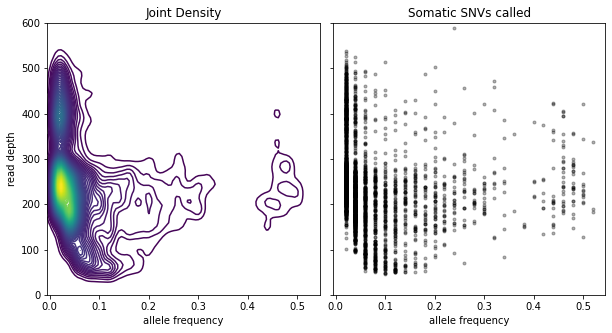

In [12]:
# plotting
levels = np.linspace(Z.min(), Z.max(), 100)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.subplots_adjust(wspace=0.05)

dp0 = 400
dp1 = 100
dp2 = 30

def add_lines(ax):
    import matplotlib.lines as mlines
    l0 = mlines.Line2D(xdata=[0, 0.5], ydata=[dp0, dp0], linestyle='-', color='C0')
    l1 = mlines.Line2D(xdata=[0, 0.5], ydata=[dp1, dp1], linestyle='-', color='C1')
    l2 = mlines.Line2D(xdata=[0, 0.5], ydata=[dp2, dp2], linestyle='-', color='C2')
    ax.add_line(l0)
    ax.add_line(l1)
    ax.add_line(l2)

def plot_kde(ax, do_add_lines=False):
    ax.contour(X, Y, Z, levels=levels)
    ax.set_ylim(0, 600)
    ax.set_xlabel('allele frequency')
    ax.set_ylabel('read depth')
    ax.set_title('Joint Density')
    if do_add_lines:
        add_lines(ax)
    return(ax)

def calls_scatter(ax):
    ax.scatter(x='AF', y='DP', marker='.', c='k', alpha=0.3, data=calls2)
    ax.set_title('Somatic SNVs called')
    ax.set_xlabel('allele frequency')

plot_kde(ax[0], do_add_lines=False)
calls_scatter(ax[1])
attila_utils.savefig(fig, 'DP-AF-jointdensity-calls')

['named-figure/AF-conddensity.png', 'named-figure/AF-conddensity.pdf']

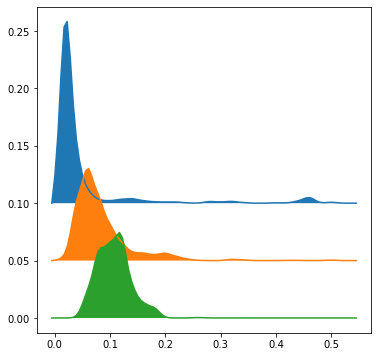

In [13]:
# start with X, Y, Z produced above
def whereDP(dp):
    ix = np.where(Y[:, 0] < dp)[0][-1] + 1
    return(ix)

def scale_ckde(ckde):
    '''Scale conditional kde'''
    val = ckde / ckde.sum()
    val[0] = 0
    val[-1] = 0
    return(val)

def plot_ckde(dp, ax, offset=0):
    ix = whereDP(dp)
    ax.plot(X[ix, :], scale_ckde(Z[ix, :]) + offset)
    ax.fill(X[ix, :], scale_ckde(Z[ix, :]) + offset, alpha=1)
    return(ax)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plot_ckde(dp0, ax, 0.1)
plot_ckde(dp1, ax, 0.05)
plot_ckde(dp2, ax, 0)
attila_utils.savefig(fig, 'AF-conddensity')

['named-figure/DP-AF-jointdensity-conddensity.png',
 'named-figure/DP-AF-jointdensity-conddensity.pdf']

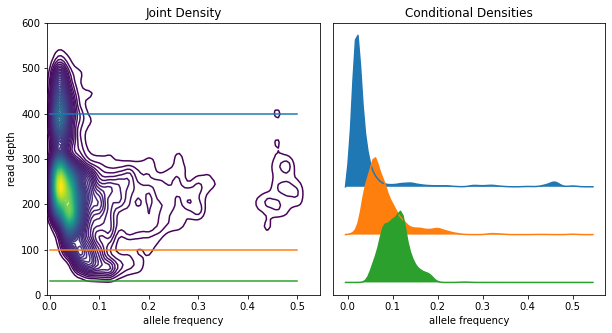

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.05)
# joint density
plot_kde(ax[0], True)
# conditional densities
plot_ckde(dp0, ax[1], 0.1)
plot_ckde(dp1, ax[1], 0.05)
plot_ckde(dp2, ax[1], 0)
ax[1].set_xlabel('allele frequency')
ax[1].set_title('Conditional Densities')
ax[1].set_yticks(ticks=[])
attila_utils.savefig(fig, 'DP-AF-jointdensity-conddensity')

['named-figure/calls-DP-AF-jointdensity-conddensity.png',
 'named-figure/calls-DP-AF-jointdensity-conddensity.pdf']

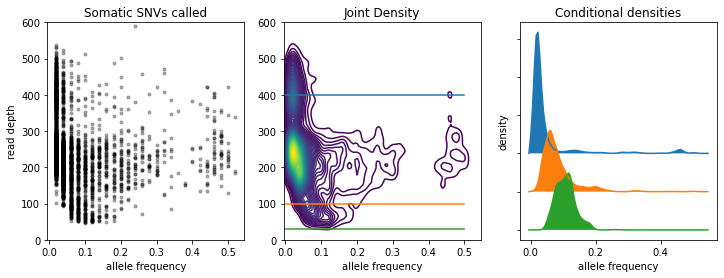

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
#fig.subplots_adjust(wspace=0.05)

calls_scatter(ax[0])
plot_kde(ax[1], do_add_lines=True)
plot_ckde(dp0, ax[2], 0.1)
plot_ckde(dp1, ax[2], 0.05)
plot_ckde(dp2, ax[2], 0)

ax[0].set_ylabel('read depth')
ax[0].set_ylim(0, 600)
ax[1].set_ylabel('')
ax[2].set_yticklabels('')
ax[2].set_title('Conditional densities')
ax[2].set_ylabel('density')
ax[2].set_xlabel('allele frequency')

attila_utils.savefig(fig, 'calls-DP-AF-jointdensity-conddensity')

In [16]:
rng = np.random.RandomState(42)
X = rng.random_sample((100, 3))
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_density = kde.score_samples(X[:3])
log_density

array([-1.52955942, -1.51462041, -1.60244657])

## Other

### Chromatin state

Our earlier visual analysis showed slight enrichment of TssA (Active TSS) and TssAFlnk (Flanking Active TSS) in SCZ somatic variants relative to Control ones.  But the variable selection above dropped `chromatinState_DLPFC` suggesting that variable carried little information on `Dx`.

This is possible even if TssA and TssAFlnk are indeed informative for `Dx` because `chromatinState_DLPFC` is a factor of 15 levels and thus adds 14 degrees of freedom to the model.  Below we test this possibility by reducing the number of levels.

In [17]:
calls1['ChromatinState_DLPFC'].cat.categories

Index(['TssA', 'TssAFlnk', 'TxFlnk', 'Tx', 'TxWk', 'EnhG', 'Enh', 'ZNF/Rpts',
       'Het', 'TssBiv', 'ReprPC', 'ReprPCWk', 'Quies'],
      dtype='object')

We first merge the TssAFlnk level into a TssA.  Then we merge all other levels into a single *Other* category.

In [18]:
s = calls1['ChromatinState_DLPFC']
other = s.cat.categories[2:]
s = s.cat.remove_categories(['TssAFlnk']).fillna('TssA')
s = s.cat.remove_categories(other).cat.add_categories('Other').fillna('Other')
s = s.cat.reorder_categories(['Other', 'TssA'], ordered=True)

Now we repeat the variable selection.

In [19]:
calls1['ChromatinState_DLPFC'] = s
best3 = fwsel.forward_selected(calls1.loc[:, :'Dx'], 'Dx')
best3.model.formula

'Dx ~ culprit + ALT + DP + AF + FILTERPASS + BaseQRankSum + GWASpval + ChromatinState_DLPFC + REF + VQSLOD + SOR + 1'

As the formula shows this time `chromatinState_DLPFC` is selected by the algorithm.  But the following summary shows that the effect of this variable is not significant (see chromatinState_DLPFC[T.Other])

In [20]:
best3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Dx   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.496
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           6.46e-16
Time:                        12:17:55   Log-Likelihood:                -1983.9
No. Observations:                3411   AIC:                             4016.
Df Residuals:                    3387   BIC:                             4163.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.0150      0.101     10.078      0.000       0.818       1.213
culprit[T.FS]                   -0.3260      0.140     -2.329      0.020      -0.600      -0.052
culprit[T.MQ]                   -0.1337      0.091     -1.468      0.142      -0.312       0.045
culprit[T.MQRankSum]            -0.6577      0.176     -3.731      0.000      -1.003      -0.312
culprit[T.QD]                   -0.3077      0.085     -3.640      0.000      -0.473      -0.142
culprit[T.ReadPosRankSum]       -0.2018      0.102     -1.984      0.047      -0.401      -0.002
culprit[T.SOR]                  -0.3031      0.092     -3.298      0.001      -0.483      -0.123
ALT[T.C]                         0.0649      0.029      2.205      0.027       0.007       0.123
ALT[T.G]                         0.0819      0.031      2.627      0.009       0.021       0.143
ALT[T.T]                         0.0188      0.022      0.841      0.400      -0.025       0.062
FILTERPASS[T.EXT;PASS/PASS]     -0.0396      0.053     -0.749      0.454      -0.143       0.064
FILTERPASS[T.HC/PASS]           -0.0252      0.053     -0.474      0.636      -0.129       0.079
FILTERPASS[T.HC;PASS/PASS]      -0.0532      0.049     -1.080      0.280      -0.150       0.043
FILTERPASS[T.PASS/PASS]          0.0402      0.054      0.750      0.453      -0.065       0.145
ChromatinState_DLPFC[T.TssA]     0.0749      0.049      1.515      0.130      -0.022       0.172
REF[T.C]                         0.0098      0.030      0.325      0.746      -0.050       0.069
REF[T.G]                         0.0519      0.031      1.650      0.099      -0.010       0.114
REF[T.T]                         0.0152      0.028      0.550      0.582      -0.039       0.069
DP                              -0.0224      0.009     -2.387      0.017      -0.041      -0.004
AF                              -0.0326      0.010     -3.276      0.001      -0.052      -0.013
BaseQRankSum                    -0.0206      0.010     -2.120      0.034      -0.040      -0.002
GWASpval                        -0.0121      0.007     -1.620      0.105      -0.027       0.003
VQSLOD                           0.0159      0.009      1.680      0.093      -0.003       0.035
SOR                              0.0144      0.010      1.422      0.155      -0.005       0.034
==============================================================================
Omnibus:                      725.674   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.739
Skew:                          -1.010   Prob(JB):                    1.84e-147
Kurtosis:                       2.181   Cond. No.                         53.9
=====================================================================

In [21]:
%connect_info

{
  "shell_port": 47817,
  "iopub_port": 37827,
  "stdin_port": 35597,
  "control_port": 53851,
  "hb_port": 43667,
  "ip": "127.0.0.1",
  "key": "c84e3218-73e155d900992ac61ff4f51e",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-ac16cfc3-7b52-460a-9f58-643bac9db4f2.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
